# Project Merchant Clustering

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetime

### Importing & cleaning sample_nm

In [54]:
nm_sampleDf = pd.read_csv('sample_nm.csv')

c:\users\aditya\appdata\local\programs\python\python37-32\lib\site-packages\IPython\core\interactiveshell.py:3170: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
nm_sampleDf = nm_sampleDf[['merchant_id','state','onboarding_date']]

In [4]:
nm_sampleDf.head()

,merchant_id,state,onboarding_date
0,6042cc1347e6b54d131545d6,Maharashtra,2021-03-06
1,6042cf7f47e6b54d13158627,West Bengal,2021-03-06
2,6042d08a47e6b54d13158645,Himachal Pradesh,2021-03-06
3,6042d08d47e6b54d13158648,Rajasthan,2021-03-06
4,6042d09347e6b54d1315864b,Madhya Pradesh,2021-03-06


### Importing & cleaning sample_mis

In [56]:
mis_sampleDf = pd.read_csv('sample_mis.csv')

In [57]:
mis_sampleDf = mis_sampleDf[['merchant_id','transaction_status']]

In [58]:
mis_sampleDf = mis_sampleDf.loc[mis_sampleDf['transaction_status'] == 'SUCCESS']
# Selecting only successfull transactions

In [8]:
mis_sampleDf.head(5)

,merchant_id,transaction_status
0,606d9e6cdd1e4cb6dc91d674,SUCCESS
1,606d2b1ddd1e4cb6dc91a082,SUCCESS
2,6040d3818989096075cb1b6d,SUCCESS
3,606d2b1ddd1e4cb6dc91a082,SUCCESS
4,606d2b1ddd1e4cb6dc91a082,SUCCESS


### Merging using inner join

In [59]:
nmMis_MergeDf = pd.merge(nm_sampleDf, mis_sampleDf, on='merchant_id', how='inner')

In [31]:
nmMis_MergeDf.head()

,merchant_id,state,onboarding_date,transaction_status
0,604308a347e6b54d1315bdbc,Uttar Pradesh,2021-03-06,SUCCESS
1,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS
2,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS
3,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS
4,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS


### Renaming states from hindi to enlish

In [60]:
nmMis_MergeDf.state.unique()

array(['Uttar Pradesh', 'Punjab', 'छत्तीसगढ़', 'Gujarat', 'West Bengal',
       'Bihar', 'Rajasthan', 'Andhra Pradesh', 'Jharkhand', 'Haryana',
       'Maharashtra', 'Karnataka', 'Delhi', 'Tamil Nadu',
       'Madhya Pradesh', 'Arunachal Pradesh', 'Telangana', 'Odisha',
       'Chhattisgarh', 'राजस्थान', 'Meghalaya', 'Assam', 'Uttarakhand',
       'Chandigarh', 'मध्य प्रदेश', 'Jammu and Kashmir',
       'Dadra and Nagar Haveli', 'Kerala', 'Himachal Pradesh', 'हरियाणा',
       'Goa', 'उत्तर प्रदेश', 'Manipur', 'Tripura', 'बिहार', 'दिल्ली',
       'महाराष्ट्र', 'हिमाचल प्रदेश', 'Mizoram', 'Puducherry', 'Sikkim',
       'Daman and Diu'], dtype=object)

In [61]:
nmMis_MergeDf['state'] = nmMis_MergeDf['state'].replace(['छत्तीसगढ़','राजस्थान','मध्य प्रदेश','हरियाणा','उत्तर प्रदेश','बिहार','दिल्ली','महाराष्ट्र','हिमाचल प्रदेश'],\
                                                        ['Chhattisgarh','Rajasthan','Madhya Pradesh','Haryana','Uttar Pradesh','Bihar','Delhi','Maharashtra',\
                                                         'Himachal Pradesh'])

In [62]:
nmMis_MergeDf.state.unique()

array(['Uttar Pradesh', 'Punjab', 'Chhattisgarh', 'Gujarat',
       'West Bengal', 'Bihar', 'Rajasthan', 'Andhra Pradesh', 'Jharkhand',
       'Haryana', 'Maharashtra', 'Karnataka', 'Delhi', 'Tamil Nadu',
       'Madhya Pradesh', 'Arunachal Pradesh', 'Telangana', 'Odisha',
       'Meghalaya', 'Assam', 'Uttarakhand', 'Chandigarh',
       'Jammu and Kashmir', 'Dadra and Nagar Haveli', 'Kerala',
       'Himachal Pradesh', 'Goa', 'Manipur', 'Tripura', 'Mizoram',
       'Puducherry', 'Sikkim', 'Daman and Diu'], dtype=object)

### Finding out months and dates since merchant onboarded

In [63]:
Today = np.datetime64('Today','D')
Today

numpy.datetime64('2021-07-30')

In [64]:
nmMis_MergeDf['onboarding_date'] = pd.to_datetime(nmMis_MergeDf['onboarding_date'])

In [65]:
nmMis_MergeDf['days_onboarded'] = Today - nmMis_MergeDf['onboarding_date']
nmMis_MergeDf['months_onboarded'] = ((Today - nmMis_MergeDf['onboarding_date'])/np.timedelta64(1, 'M'))

In [37]:
nmMis_MergeDf.round(4).head(7)

,merchant_id,state,onboarding_date,transaction_status,days_onboarded,months_onboarded
0,604308a347e6b54d1315bdbc,Uttar Pradesh,2021-03-06,SUCCESS,146 days,4.7968
1,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS,146 days,4.7968
2,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS,146 days,4.7968
3,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS,146 days,4.7968
4,6043121b47e6b54d1315d07d,Punjab,2021-03-06,SUCCESS,146 days,4.7968
5,60431a1747e6b54d1315ed6f,Chhattisgarh,2021-03-06,SUCCESS,146 days,4.7968
6,60431b0a47e6b54d1315f161,Gujarat,2021-03-06,SUCCESS,146 days,4.7968


### Finding which state has highest number of successfull transactions

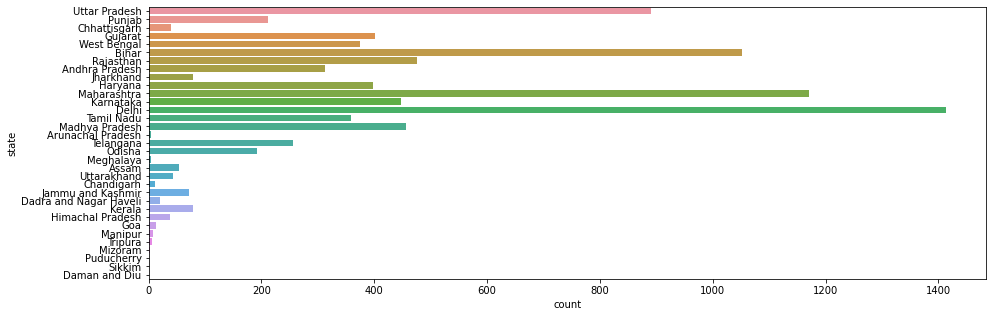

In [66]:
plt.figure(figsize=(15,5))
sns.countplot(y='state',data=nmMis_MergeDf)
plt.show()

 Delhi has highest number of successfull transactions in the past months
### Since there are many states, I will divide them into North, West, East & South India

In [67]:
nmMis_MergeDf = nmMis_MergeDf.replace(to_replace =['Uttarakhand','Himachal Pradesh','Uttar Pradesh','Delhi','Punjab','Chhattisgarh','Haryana','Jammu and Kashmir',
                                                   'Madhya Pradesh','Chandigarh'], 
                            value ="North India")


nmMis_MergeDf = nmMis_MergeDf.replace(to_replace =['Maharashtra', 'Daman and Diu', 'Gujarat', 'Rajasthan', 'Goa', 'Dadra and Nagar Haveli'], 
                            value ="West India")

nmMis_MergeDf = nmMis_MergeDf.replace(to_replace =['Andhra Pradesh','Karnataka','Tamil Nadu','Kerala', 'Puducherry', 'Telangana'], 
                            value ="South India")

nmMis_MergeDf = nmMis_MergeDf.replace(to_replace =['Jharkhand', 'Bihar','West Bengal', 'Manipur', 'Tripura', 'Mizoram',
    'Sikkim','Arunachal Pradesh', 'Odisha','Meghalaya', 'Assam', ], 
                            value ="East India")

In [51]:
nmMis_MergeDf.state.unique()

array(['North India', 'West India', 'South India', 'East India'],
      dtype=object)

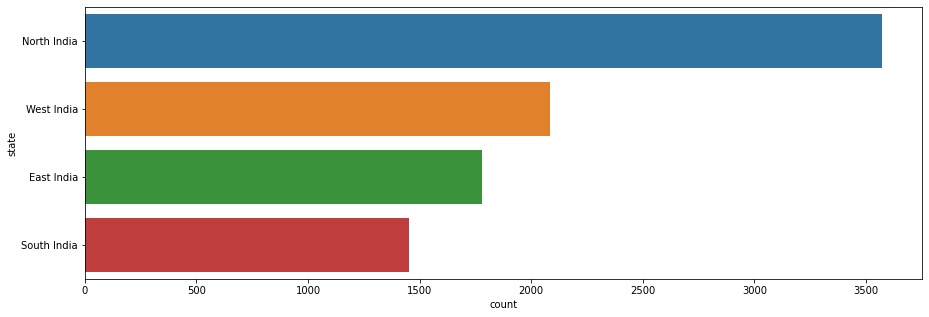

In [68]:
plt.figure(figsize=(15,5))
sns.countplot(y='state',data=nmMis_MergeDf)
plt.show()

North India has highest number of successfull transactions in the past months
### Now creating a new dataframe for clustering

In [69]:
nmMis_clusterDf = nmMis_MergeDf.copy()
nmMis_clusterDf.drop(['merchant_id','onboarding_date','days_onboarded','transaction_status'], axis=1, inplace=True)

In [70]:
nmMis_clusterDf.head()

,state,months_onboarded
0,North India,4.796813
1,North India,4.796813
2,North India,4.796813
3,North India,4.796813
4,North India,4.796813


#### <b> I plan, for this version 1, on clustering together merchants who have done successfull transactions on the basis of
##### 1) where they live
##### 2) how many months have they been with us </b>

In [71]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
nmMis_clusterDf['state_encoded'] = le.fit_transform(nmMis_clusterDf['state'].values)

In [75]:
nmMis_clusterDf = nmMis_clusterDf[['state','state_encoded','months_onboarded']]
nmMis_clusterDf.head()

,state,state_encoded,months_onboarded
0,North India,1,4.796813
1,North India,1,4.796813
2,North India,1,4.796813
3,North India,1,4.796813
4,North India,1,4.796813


### According to label Data:
East India = 0 <br>
North India = 1<br>
South India = 2<br>
West India = 3



### Clustering using KMeans Algorithm

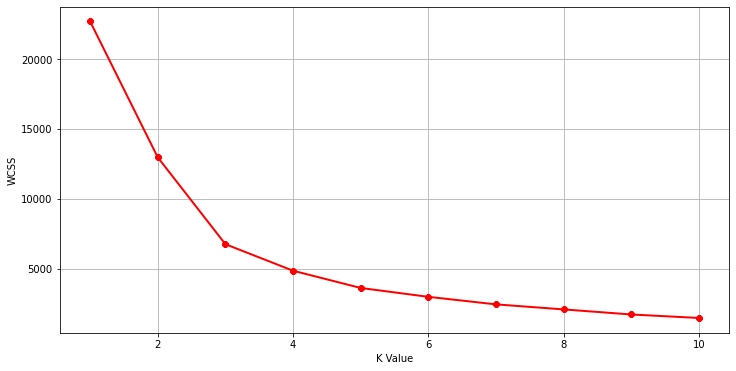

In [76]:
X1 = nmMis_clusterDf.loc[:,["state_encoded","months_onboarded"]].values

from sklearn.cluster import KMeans
wcss = []

for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [77]:
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[1 1 1 ... 1 1 0]


In [78]:
print(kmeans.cluster_centers_)

[[2.57280617 4.14136289]
 [0.85720182 4.07378867]
 [0.51058743 1.817297  ]
 [2.5956     2.10878416]]


### Visualising using Scatter Plot

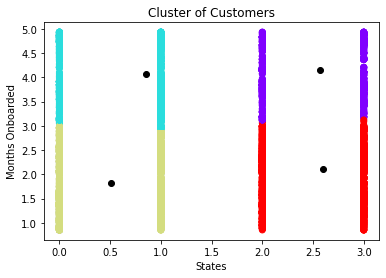

In [79]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] , kmeans.cluster_centers_[:,1], color ='black')
plt.title('Cluster of Customers')
plt.xlabel('States')
plt.ylabel('Months Onboarded')
plt.show()

### Clusters:
Aqua = Customers from North India and East India who have onboarded nearly 3 months ago and have made successfull transactions <br>
Purple = Customers from South India and West India who have onboarded nearly 4.25 months ago and have made successfull transactions <br>
Yellow = Customers from North India and East India who have onboarded nearly 1.8 months ago and have made successfull transactions <br>
Red = Customers from South India and West India who have onboarded nearly 2 months ago and have made successfull transactions 